In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from marvin import config
config.setDR('DR16')

## Download
## drpAll http://svn.sdss.org/public/repo/manga/mangadrp/tags/v2_4_3/drpall-v2_4_3.fits
## dapAll https://data.sdss.org/sas/dr16/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits

## Move to
## ~/sas/dr16/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits
## ~/sas/dr16/manga/spectro/analysis/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits

## Query
from marvin.tools.query import Query

## One Step Query
from marvin.tools.query import doQuery
import marvin.utils.plot.map as mapplot
from marvin.tools import Maps

[INFO]: No release version set. Setting default to DR15


In [4]:
# Query Tutorial https://sdss-marvin.readthedocs.io/en/latest/tutorials/notebooks/marvin_queries.html

filter = 'nsa.elpetro_absmag_r > -19 and nsa.elpetro_logmass < 9.69897 and cube.quality == 0'
quality = ['DONOTUSE']
query = Query(search_filter=filter, quality=quality)

# print Groups of Parameter
for group in query.datamodel.groups:
    print( group )

# print NSA Parameters
nsa = query.datamodel.groups['nsa']
# for parameter in nsa.parameters:
#     print( parameter )

Metadata
Spaxel Metadata
Emission Lines
Kinematics
Spectral Indices
NSA Catalog
ObsInfo
DAPall Summary
Other


In [5]:
# Result Tutorial https://sdss-marvin.readthedocs.io/en/latest/tutorials/notebooks/Marvin_Results.html
result = query.run()
print('There are %d galaxies' %(result.totalcount))

#result.results
result.convertToTool('maps', limit=5)
galaxies = result.objects

#print(galaxies)
#result.download()

There are 32 galaxies
Converting results to Marvin Maps objects


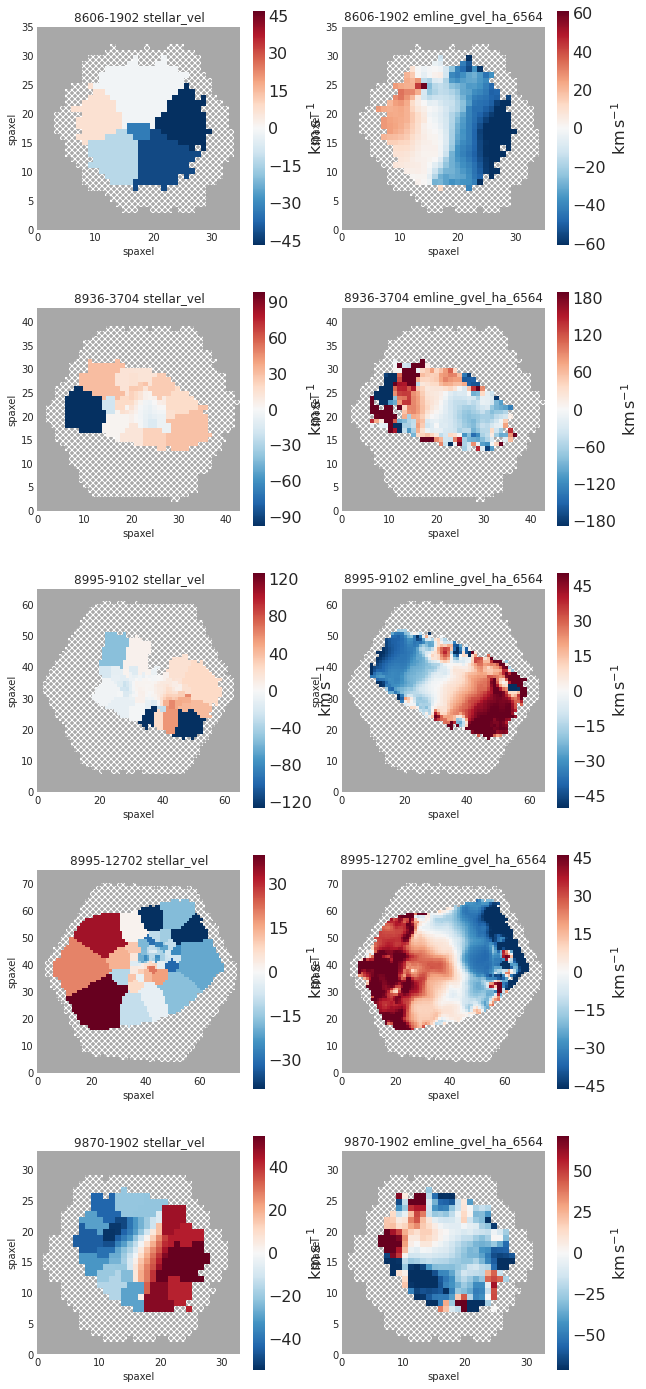

In [6]:
# Plotting Tutorial https://sdss-marvin.readthedocs.io/en/latest/tutorials/plotting-tutorial.html
# stellar_sigma_maps = galaxy.stellar_vel
# h_alpha_vel_maps = galaxy.emline_emline_gvel_ha_6564
# nii_vel_maps = galaxy.emline_emline_gvel_nii_6585

plateifus = []
for galaxy in galaxies:
    plateifus.append(galaxy.plateifu)
    
mapnames = ['stellar_vel', 'emline_gvel_ha_6564']

with plt.style.context('seaborn-darkgrid'):
    
    rows = len(plateifus)
    cols = len(mapnames)
    fig, axes = plt.subplots(rows, cols, figsize=(10, 25))
    
    for row, plateifu in zip(axes, plateifus):
        
        maps = Maps(plateifu=plateifu)
        for ax, mapname in zip(row, mapnames):
            mapplot.plot( dapmap=maps[mapname], fig=fig, ax=ax, title=' '.join((plateifu, mapname)))

#    fig.tight_layout()

In [5]:
from marvin.utils.general import downloadList

# create a list of target ids
# plateifus = ['8485-1901', '8485-1902', '7443-1901']
# download the DAP 2d MAPS files for these targets
# dllist = downloadList(plateifus, dltype='maps')

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('marvin_table.csv')

In [8]:
plateifus = df['plateifu']

In [9]:
inputList = []
for i in range(0, len(plateifus) ):
    inputList.append(plateifus[i])
#print(inputList)

In [13]:
dllist = downloadList(inputList, dltype='maps', daptype='HYB10-GAU-MILESHC', test=false, verbose=True)
print(dllist)

rsync -R rsync://dtn.sdss.org/dr16/manga/spectro/analysis/v2_4_3/2.2.1/HYB10-GAU-MILESHC/9193/1901/manga-9193-1901-MAPS-HYB10-GAU-MILESHC.fits.gz
rsync -R rsync://dtn.sdss.org/dr16/manga/spectro/analysis/v2_4_3/2.2.1/HYB10-GAU-MILESHC/8080/1902/manga-8080-1902-MAPS-HYB10-GAU-MILESHC.fits.gz
rsync -R rsync://dtn.sdss.org/dr16/manga/spectro/analysis/v2_4_3/2.2.1/HYB10-GAU-MILESHC/9193/12703/manga-9193-12703-MAPS-HYB10-GAU-MILESHC.fits.gz
rsync -R rsync://dtn.sdss.org/dr16/manga/spectro/analysis/v2_4_3/2.2.1/HYB10-GAU-MILESHC/8081/3703/manga-8081-3703-MAPS-HYB10-GAU-MILESHC.fits.gz
rsync -R rsync://dtn.sdss.org/dr16/manga/spectro/analysis/v2_4_3/2.2.1/HYB10-GAU-MILESHC/7815/9102/manga-7815-9102-MAPS-HYB10-GAU-MILESHC.fits.gz
rsync -R rsync://dtn.sdss.org/dr16/manga/spectro/analysis/v2_4_3/2.2.1/HYB10-GAU-MILESHC/7815/6101/manga-7815-6101-MAPS-HYB10-GAU-MILESHC.fits.gz
rsync -R rsync://dtn.sdss.org/dr16/manga/spectro/analysis/v2_4_3/2.2.1/HYB10-GAU-MILESHC/7972/3701/manga-7972-3701-MAPS-HY

KeyboardInterrupt: 